In [52]:
import numpy as np
# from src.data.make_dataset import example_1d
import sys
sys.path.append('/home/emmanuel/projects/2019_egp/src')
from data.make_dataset import ToyData1D
from models.gp_models import HeteroGP, BasicGP, SparseGP
from models.egp import EGP, EEGP
from experiments.experiments_1d import EmpiricalVariance
from visualization.visualize import plot_gp
from sklearn.model_selection import train_test_split
from sklearn.exceptions import ConvergenceWarning

import warnings
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.simplefilter('ignore', FutureWarning)

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data

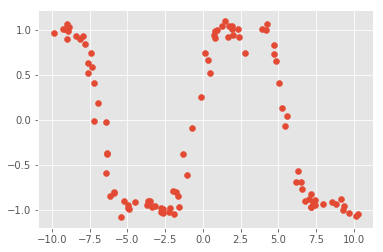

In [54]:
dataset = 'square_wave'
save_path = '/home/emmanuel/projects/2019_egp/reports/figures/letter_egp/experiment_1d/'
n_samples = 1000


data = ToyData1D().get_data()
# Training and Testing
xtrain, _, ytrain, _ = train_test_split(
    data['X'], data['y'],
    train_size=0.1, random_state=123
)

xtest = np.linspace(data['X'].min(), data['X'].max(), n_samples)
# ytest = data['y']

fig, ax = plt.subplots()
ax.scatter(xtrain, ytrain)
plt.show()

## Models

In [55]:
# Model I - Simple GP
basic_gp = BasicGP()
basic_gp.fit(xtrain[:, None], ytrain[:, None]);

# Model II - Heteroscedastic GP
hetero_gp = HeteroGP(xtrain[:, None], clusters=10)
hetero_gp.fit(xtrain[:, None], ytrain[:, None]);

# Model III - EGP
error_gp = EGP(x_cov=data['x_noise'])
error_gp.fit(xtrain[:, None], ytrain[:, None]);

In [56]:
predictions = {}
variances = {}

predictions['basic'], variances['basic'] = basic_gp.predict(xtest[:, None], return_std=True)
predictions['hetero'], variances['hetero'] = hetero_gp.predict(xtest[:, None], return_std=True)
predictions['error'], variances['error'] = error_gp.predict(xtest[:, None], return_std=True)

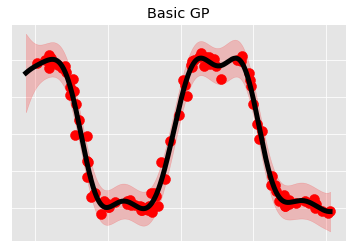

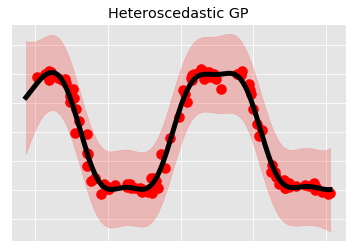

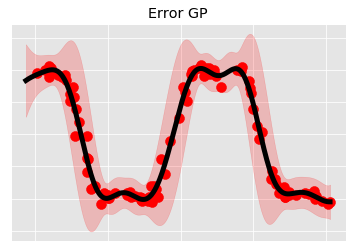

In [57]:
plot_gp(xtest, predictions['basic'], 1*variances['basic'], xtrain, ytrain, 'Basic GP');
plot_gp(xtest, predictions['hetero'], 1*variances['hetero'], xtrain, ytrain, 'Heteroscedastic GP');
plot_gp(xtest, predictions['error'], 1*variances['error'], xtrain, ytrain, 'Error GP');


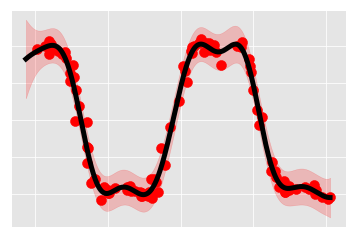

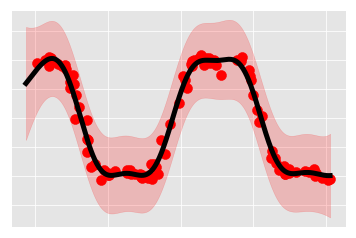

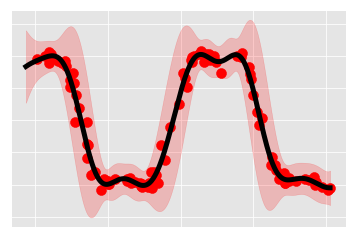

In [58]:
plot_gp(
    xtest, 
    predictions['basic'], 
    1*variances['basic'], 
    xtrain, ytrain, 
    save_name=f"{save_path}gp_standard.png");

plot_gp(
    xtest, 
    predictions['hetero'], 
    1*variances['hetero'], 
    xtrain, 
    ytrain, 
    save_name=f"{save_path}gp_hetero.png");

plot_gp(
    xtest, 
    predictions['error'], 
    1*variances['error'], 
    xtrain, 
    ytrain, 
    save_name=f"{save_path}gp_uncertain.png"
);

## Empirical Variance

In [59]:
variance_exp = EmpiricalVariance(n_trials=100)

variance_exp.run_1d_experiment()

basic
heteroscedastic
error
variational
Running Scaled Conjugate Gradients Code:
  runtime   i     f              |g|        
    00s02  002   7.167513e+01   2.120796e+02 
    00s09  008   2.723587e+01   2.752430e+02 
    00s18  011   2.786332e+01   7.550600e+00 
    01s55  134   2.688682e+01   1.673114e-02 
Runtime:     01s55
Optimization status: converged - relative reduction in objective

Trial: 1
Trial: 11
Trial: 21
Trial: 31
Trial: 41
Trial: 51
Trial: 61
Trial: 71
Trial: 81
Trial: 91


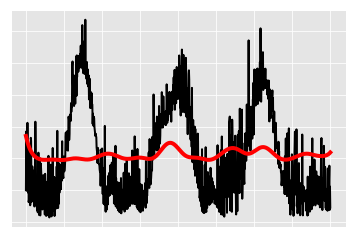

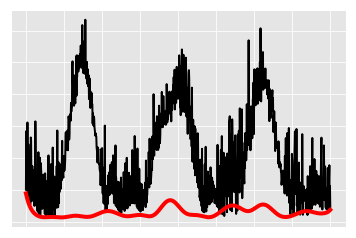

In [60]:
variance_exp.plot_average_empirical('basic', metric='mae', with_bias=True)
variance_exp.plot_average_empirical('basic', metric='mae', with_bias=False)
variance_exp.plot_average_empirical('basic', metric='mae', with_bias=True, show=False)

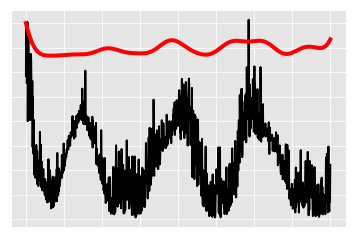

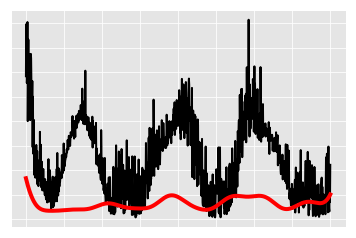

In [61]:
variance_exp.plot_average_empirical('heteroscedastic', metric='mae', with_bias=True)
variance_exp.plot_average_empirical('heteroscedastic', metric='mae', with_bias=False)
variance_exp.plot_average_empirical('heteroscedastic', metric='mae', with_bias=True, show=False)

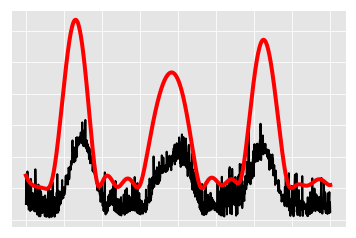

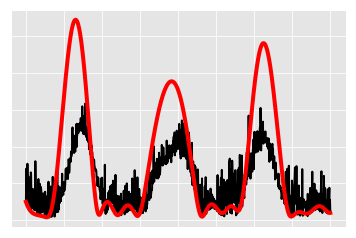

In [62]:
variance_exp.plot_average_empirical('error', metric='mae', with_bias=True)
variance_exp.plot_average_empirical('error', metric='mae', with_bias=False)
variance_exp.plot_average_empirical('error', metric='mae', with_bias=True, show=False)